In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [139]:
##PART 1

In [140]:
df = pd.read_excel('Rapido Data Analyst Assignment DataSet.xlsx')

In [141]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [142]:
df.isna().sum()

trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64

In [143]:
##WE see no missing values in the dataset

In [144]:
df.dtypes

trip_id             object
customer_id         object
timestamp            int64
pick_lat           float64
pick_lng           float64
drop_lat           float64
drop_lng           float64
travel_distance    float64
travel_time        float64
trip_fare            int64
dtype: object

In [145]:
##Latitutes and Longitudes are not exactly numbers, but instead they will be treated as co-ordinates, so we will not
#evaluate them as numbers as such

In [146]:
df.shape

(44587, 10)

In [147]:
df['trip_id'].nunique()

44587

In [148]:
df['customer_id'].nunique()

19139

In [149]:
#19139 customers

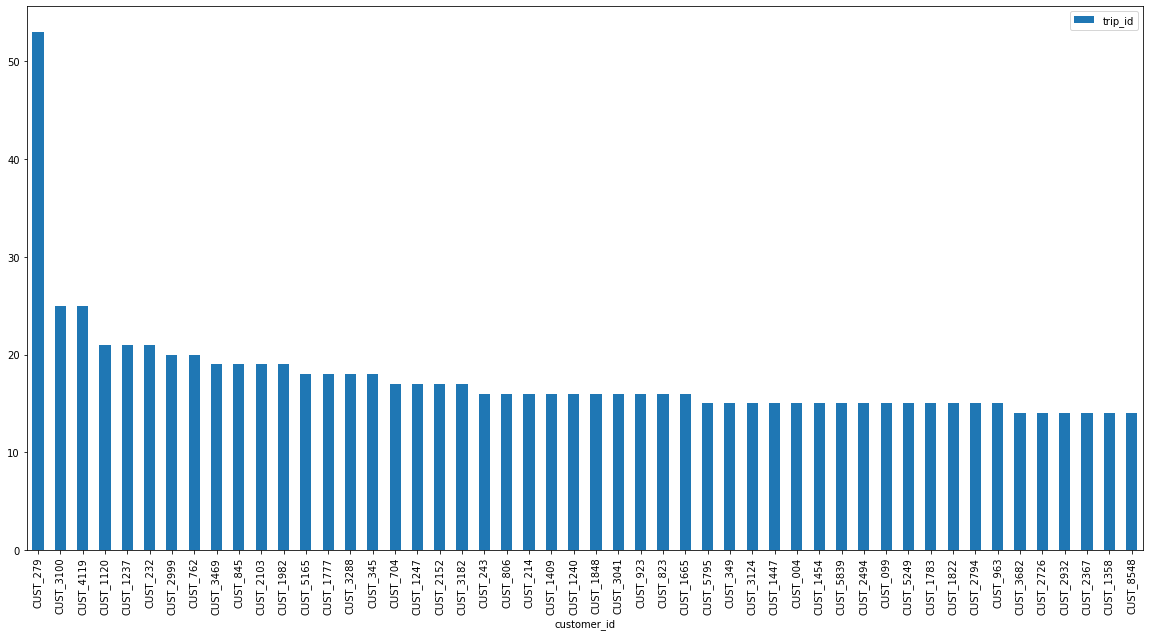

In [150]:
df.groupby('customer_id').agg({'trip_id':'count'}).sort_values(by='trip_id',ascending=False).head(50).plot.bar(figsize=(20,10))

In [151]:
##Above we see top 50 customers based on the number of rides they have taken

In [152]:
##We see that Customer 279 has actually taken a lot more rides than all the other customers

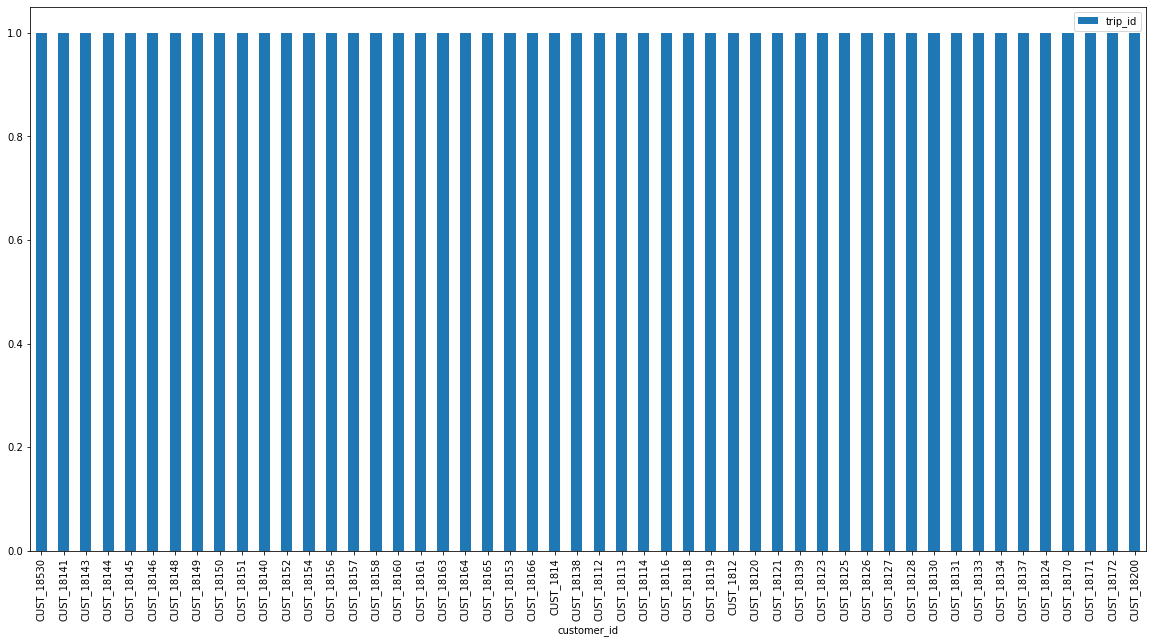

In [153]:
##similarly we can find the customers which have taken the least number of rides:

df.groupby('customer_id').agg({'trip_id':'count'}).sort_values(by='trip_id',ascending=True).head(50).plot.bar(figsize=(20,10))

In [154]:
##so, we see that the least number of rides is actually only 1, which means that there are quite a few customers who just
#took a single ride, so let's find out how many customers took only one ride until now

In [155]:
dfx = df.groupby('customer_id').agg({'trip_id':'count'}).reset_index()
(dfx[dfx['trip_id']==1].shape[0]/dfx.shape[0])*100

52.29635822143268

In [156]:
##so, 52.3% (approx) of customers took only one ride after installing the app, until now
##This is a business insight to note and this will help us target these customers for offers

In [157]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [158]:
df.dtypes

trip_id             object
customer_id         object
timestamp            int64
pick_lat           float64
pick_lng           float64
drop_lat           float64
drop_lng           float64
travel_distance    float64
travel_time        float64
trip_fare            int64
dtype: object

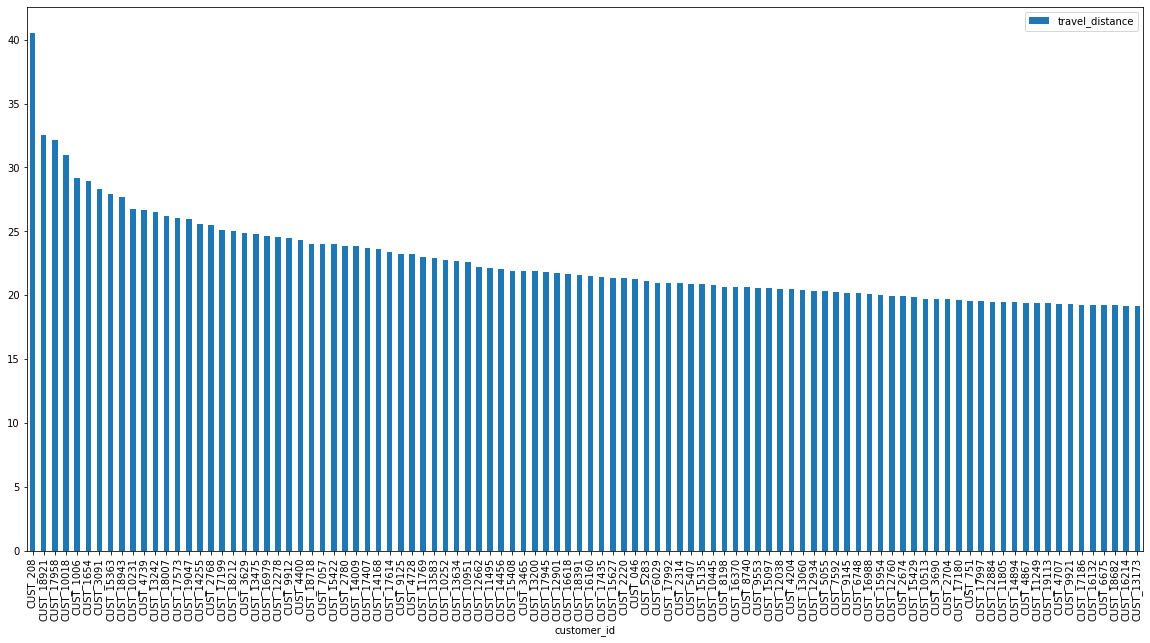

In [159]:
df.groupby('customer_id').agg({'travel_distance':'mean'}).sort_values(by='travel_distance',ascending=False).head(100).plot.bar(figsize=(20,10))

In [160]:
##Top 100 customers by the mean of their travel distance, showcased above

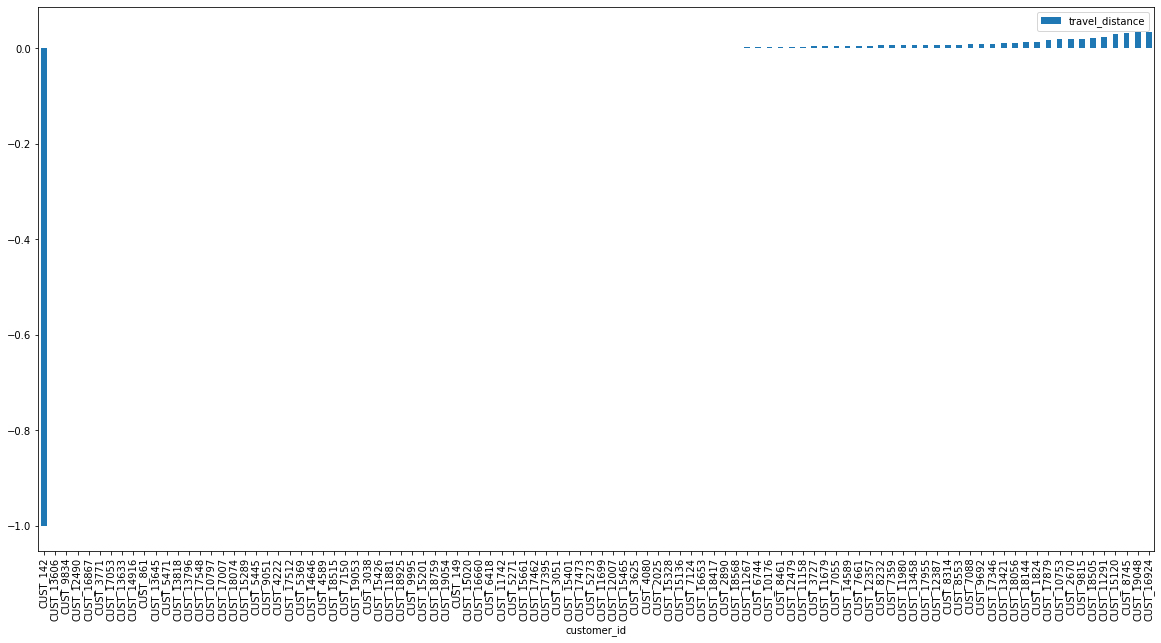

In [161]:
df.groupby('customer_id').agg({'travel_distance':'mean'}).sort_values(by='travel_distance',ascending=True).head(100).plot.bar(figsize=(20,10))

In [162]:
#Bottom 100 customers by the mean of their travel distance, showcased above

In [163]:
##So, we notice that one customer has traveled a mean distance of -1. Now, this could mean two things: Either the data was entered
#incorrectly, or else the customer travelled in the wrong direction(opposite to the one shown in the map) for 1 KM
##It could actually mean other things as well, but at this moment, we can understand that something did go wrong with this
#customer
##And the other customers who have not traveled at all, have traveled distance as 0. But, again, these customers do have
#co-ordinates in the data, which means that they have surely booked rides, and then cancelled them
#so, again an insight to note, that quite a few customers have cancelled rides, which is not a good sign.
##These users again become a target, for promoting offers, so that they start travelling

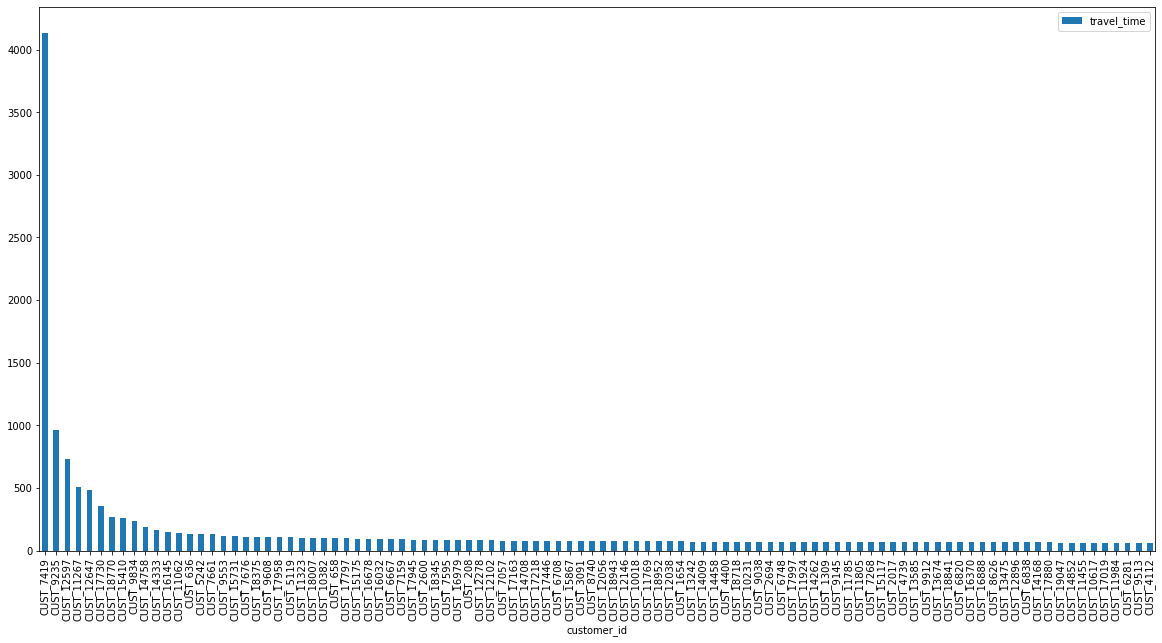

In [164]:
df.groupby('customer_id').agg({'travel_time':'mean'}).sort_values(by='travel_time',ascending=False).head(100).plot.bar(figsize=(20,10))

In [165]:
df[['travel_distance','travel_time','trip_fare']].corr()  ##Checking correlation among numeric variables

,travel_distance,travel_time,trip_fare
travel_distance,1.000000,0.371180,0.889397
travel_time,0.371180,1.000000,0.345552
trip_fare,0.889397,0.345552,1.000000


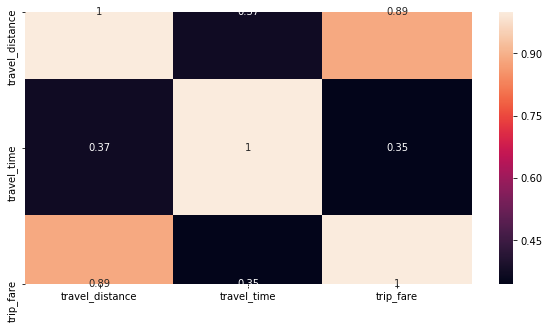

In [166]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['travel_distance','travel_time','trip_fare']].corr(),annot=True)
plt.show()

In [167]:
##We see that quite obviously, travel distance and trip fare are very much correlated to each other

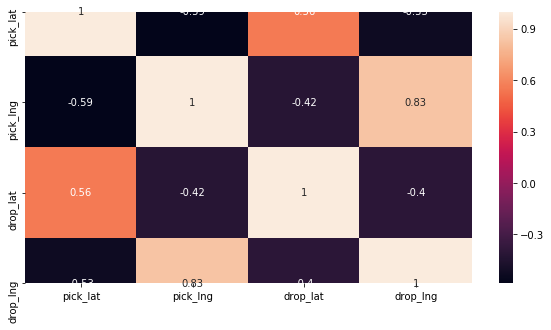

In [168]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['pick_lat','pick_lng','drop_lat','drop_lng']].corr(),annot=True)
plt.show()

In [169]:
##We do see correlation among latitudes and longitudes, which is again very obvious because latitudes and longitudes are
#used to measure the position of the vehicle/person

In [332]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [333]:
dfcopy = df

In [334]:
import time
import datetime
from datetime import timedelta
dfcopy['timestamp'] = dfcopy['timestamp'].apply(lambda d: time.strftime('%m/%d/%Y %H:%M:%S',  time.gmtime(d/1000.)))

In [336]:
dfcopy.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,01/05/2019 17:27:50,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,01/05/2019 17:28:29,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,01/05/2019 17:28:51,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,01/05/2019 17:29:18,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,01/05/2019 17:29:46,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


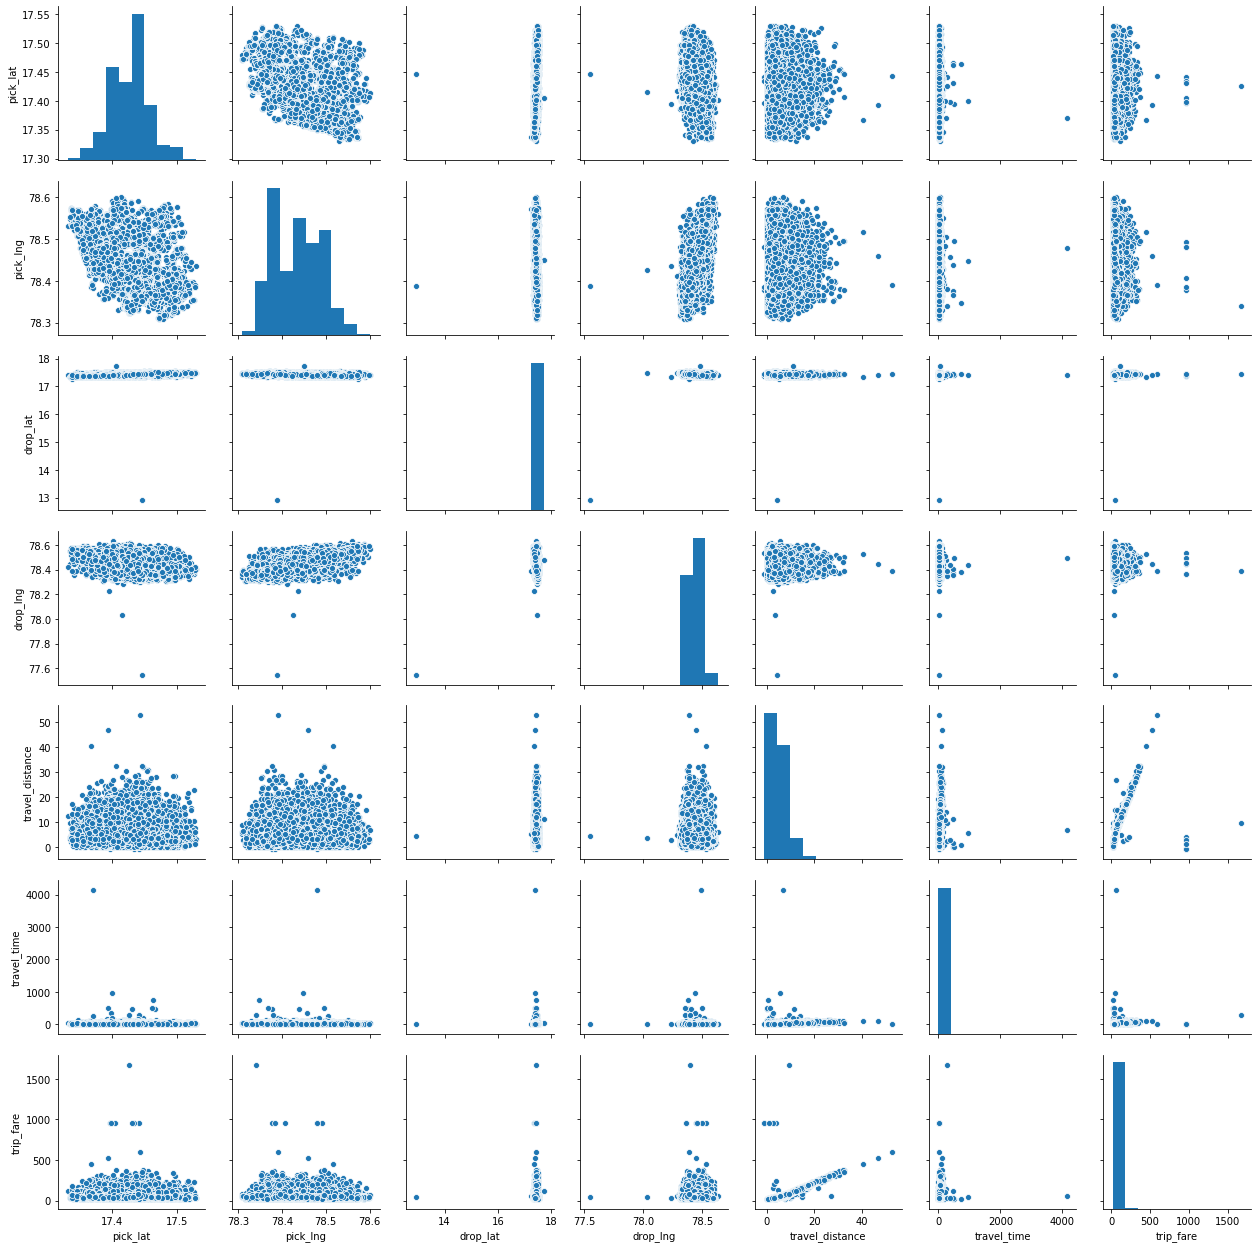

In [335]:
sns.pairplot(data=dfcopy)
plt.show()

In [ ]:
##So, if we see the last row, we can understand that the trip fare does not depend on the pick location, but trip fare
#does depend on travel distance, but not travel time (which is a good thing for customers in busy citis with lots of traffic
#since they won't have to pay more for spending time in the traffic)
##Travel distance does not depend on pick and drop locations in any way, since we do see a properly spread cluster of values in
#the scatterplot, and this is quite obvious in a real life perspective
#Latitude VS Longitude scatterplot is not much interpretable at this moment(since it would be better to check it out
#on a map, but of course the spread of values in the plot is what shows that trips are being taken all across the city/country
#and not just in some specific location--of course, there might be ceratin areas where trips might be more, and we'll check
#that out using clustering)

In [339]:
dfcopy.dtypes[dfcopy.dtypes!=object].index

Index(['pick_lat', 'pick_lng', 'drop_lat', 'drop_lng', 'travel_distance',
       'travel_time', 'trip_fare'],
      dtype='object')

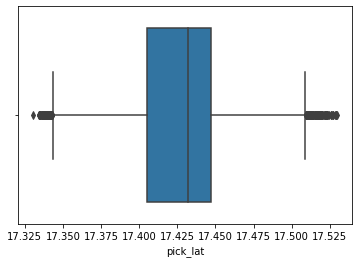

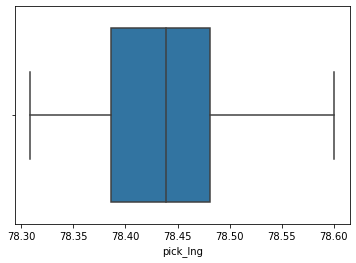

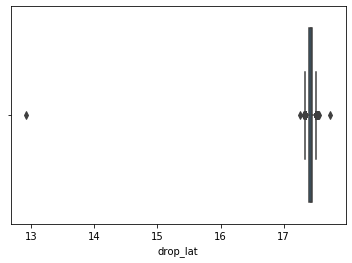

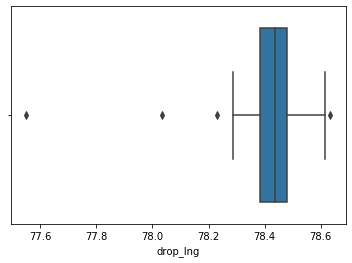

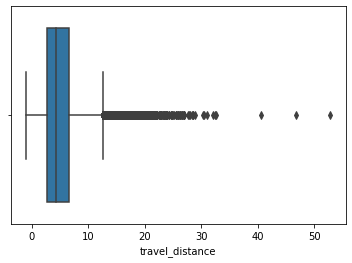

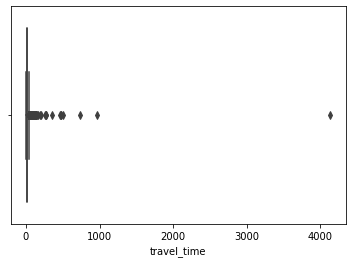

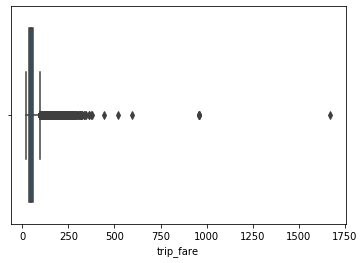

In [340]:
for i in dfcopy.dtypes[dfcopy.dtypes!=object].index:
    sns.boxplot(df[i])
    plt.show()

In [ ]:
##Latitudes and longitudes are definitely bound to have outliers, because there would be people taking trips from remote
#areas of the city, almost everyday, but the number of those people would be very less, which is acceptable, and hence these
#outliers are still important for our predictions then
##Travel distance also sees a lot of outiers, particularly above the upper whisker, which could definitely signify that
#certain people do prefer to take trips only when they have to travel to a very far off place, or let's say if they are late,
#and they feel like they won't be able to make it in time to the far off place--this could be one of the many insights

In [350]:
dfcopy['timestamp'].apply(lambda d: str(d)[6:10]).unique()

array(['2019'], dtype=object)

In [353]:
##So, we see we have data only for 2019 at the moment. If we had had data for other years as well, I would have created
#a column for year too, for analyzing it through the years
##For now, let's check the months:
dfcopy['month'] = dfcopy['timestamp'].apply(lambda d: str(d)[3:5])

In [354]:
dfcopy.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare,month
0,ID001,CUST_001,01/05/2019 17:27:50,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37,05
1,ID002,CUST_002,01/05/2019 17:28:29,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119,05
2,ID003,CUST_003,01/05/2019 17:28:51,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27,05
3,ID004,CUST_004,01/05/2019 17:29:18,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121,05
4,ID005,CUST_005,01/05/2019 17:29:46,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58,05


In [361]:
df.groupby(['customer_id','month']).agg({'trip_id':'count'}).sort_values(by='trip_id',ascending=False).head(20)

trip_id
customer_id month         
CUST_279    06          13
            02           9
            03           9
            04           9
CUST_9356   02           8
CUST_6169   04           7
CUST_1120   05           7
CUST_232    02           7
CUST_279    07           7
CUST_746    05           6
CUST_2103   02           6
CUST_2999   05           6
CUST_2280   07           6
CUST_6871   04           6
CUST_605    04           6
CUST_11480  03           6
CUST_14881  05           6
CUST_5839   05           6
CUST_10441  02           6
CUST_6583   03           6

In [362]:
##Above we can see that our top customers have travelled in which month, and how many trips they have taken in that month

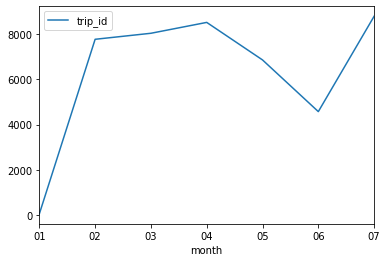

In [367]:
df.groupby('month').agg({'trip_id':'count'}).plot()

In [ ]:
##Above we can see the trend analysis of trips across months in the year 2019
##Trips shot up from January to February (which gives us an insight to work upon offers, etc. in January)
##and of course, if people are travelling extensively in February, we can try to cool down on the offers(since people are
#already willing to travel much in this period--based on the trend)
##Trips started falling in April and came to the lowest in June, but then again shot up in July
##Again, it is very much possible that new offers were introduced in these months, which caused the trips to shoot up, or maybe
##like based on the weather conditions in February, people started taking more rides
##July is again a part of monsoon, so heavy rains could be a reason for trips shooting up. There could be many such reasons
#which we can analyze based on which locations the data was collected from and what were the social, economic and weather
#conditions in that area at the period of time which is being analyzed

In [171]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [172]:
dfc  = df.groupby('customer_id').agg({'trip_id':'count'}).reset_index()

In [181]:
dfc[dfc['trip_id']>=2]['customer_id'].values

array(['CUST_001', 'CUST_003', 'CUST_004', ..., 'CUST_9994', 'CUST_9997',
       'CUST_9998'], dtype=object)

In [200]:
dfimp = df.set_index('customer_id').loc[dfc[dfc['trip_id']>=2]['customer_id'].values].reset_index()

In [201]:
dfimp.sort_values(by='travel_time',ascending=True)
##To check whether the person travelled or not

,customer_id,trip_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
32541,CUST_8946,ID42402,1546518741034,17.435299,78.407646,17.433300,78.386146,0.626,0.022750,21
31852,CUST_8654,ID12669,1546603056993,17.452524,78.369995,17.454834,78.380447,0.000,0.043200,20
30467,CUST_806,ID22054,1546443552343,17.411129,78.483528,17.418114,78.456963,1.586,0.044133,29
7488,CUST_1486,ID1661,1546872491138,17.441166,78.346619,17.433927,78.384758,0.000,0.044667,20
30831,CUST_8218,ID21130,1546437811615,17.453932,78.365944,17.451685,78.371239,0.000,0.047017,20
...,...,...,...,...,...,...,...,...,...,...
2668,CUST_11323,ID34022,1546683655226,17.439615,78.396111,17.437134,78.443306,12.694,151.360383,134
33899,CUST_9608,ID42630,1546519891598,17.398933,78.484329,17.408371,78.511322,10.907,199.998283,106
8745,CUST_16145,ID32819,1546673001186,17.441961,78.380425,17.464079,78.351417,2.222,276.133667,34
24711,CUST_636,ID670,1546537665127,17.465956,78.376404,17.439905,78.376053,11.330,467.443383,113


In [202]:
dfimp.sort_values(by='trip_fare',ascending=True)
##To check whether the person travelled or not

,customer_id,trip_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
28324,CUST_7245,ID34918,1546690913934,17.425589,78.548241,17.394815,78.541061,0.613,4.902867,20
16442,CUST_3507,ID30871,1546655841789,17.367819,78.467850,17.378286,78.482071,0.000,0.065400,20
16535,CUST_3539,ID33062,1546675096351,17.387089,78.485764,17.400879,78.471619,0.105,0.331717,20
16562,CUST_3553,ID12333,1546600753946,17.407560,78.440773,17.438858,78.390732,0.037,1.635983,20
31948,CUST_8694,ID21225,1546438327159,17.443996,78.391876,17.458584,78.385841,0.440,2.831383,20
...,...,...,...,...,...,...,...,...,...,...
20396,CUST_4924,ID12637,1546602838986,17.440790,78.377480,17.447018,78.363709,-1.000,11.838667,959
28026,CUST_7151,ID17207,1546407689604,17.433880,78.384483,17.441532,78.362556,-1.000,11.014850,959
12087,CUST_2196,ID27305,1546858611537,17.404274,78.492340,17.411062,78.493576,2.700,10.949667,959
2259,CUST_11066,ID26723,1546853008950,17.430353,78.406220,17.432350,78.449013,4.000,10.143917,959


In [203]:
##So, now we know that in dfimp, people have travelled at least twice, and none of these trips were cancelled

In [204]:
dfimp['customer_id'].nunique()

9130

In [205]:
dfimp.shape[0]

34578

In [206]:
dfimp['customer_id'].unique()

array(['CUST_001', 'CUST_003', 'CUST_004', ..., 'CUST_9994', 'CUST_9997',
       'CUST_9998'], dtype=object)

In [207]:
import time
import datetime
from datetime import timedelta
dfimp['timestamp'] = dfimp['timestamp'].apply(lambda d: time.strftime('%m/%d/%Y %H:%M:%S',  time.gmtime(d/1000.)))

In [208]:
dfimp

,customer_id,trip_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,CUST_001,ID001,01/05/2019 17:27:50,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,CUST_001,ID1390,01/07/2019 14:24:43,17.451511,78.370468,17.443994,78.363037,10.624,26.600417,99
2,CUST_001,ID1867,01/07/2019 15:07:29,17.421120,78.339172,17.426586,78.324600,10.896,33.192900,107
3,CUST_001,ID4984,01/06/2019 09:07:22,17.340305,78.543899,17.340197,78.543892,3.547,8.611033,41
4,CUST_001,ID5270,01/06/2019 10:12:37,17.441196,78.391518,17.441196,78.391518,7.523,17.608217,73
...,...,...,...,...,...,...,...,...,...,...
34573,CUST_9997,ID17906,01/02/2019 07:16:29,17.402945,78.510292,17.409569,78.495979,3.650,10.519383,44
34574,CUST_9997,ID33233,01/05/2019 08:20:55,17.422640,78.382416,17.395067,78.439102,9.021,15.895017,78
34575,CUST_9998,ID15428,01/02/2019 02:52:12,17.464779,78.367683,17.443724,78.380577,2.340,5.758983,34
34576,CUST_9998,ID16329,01/02/2019 04:19:48,17.397318,78.400559,17.413199,78.394524,0.000,0.078683,20


In [209]:
dfimp[dfimp['customer_id']=='CUST_001'].head(2).iloc[0]['timestamp']
##Trying for one customer

'01/05/2019 17:27:50'

In [218]:
difflist = []
for i in dfimp['customer_id'].unique():
    datetimeFormat = '%m/%d/%Y %H:%M:%S'
    dat1 = dfimp[dfimp['customer_id']==i].sort_values(by='timestamp',ascending=True).head(2).iloc[0]['timestamp']
    dat2 = dfimp[dfimp['customer_id']==i].sort_values(by='timestamp',ascending=True).head(2).iloc[1]['timestamp']
    diff = datetime.datetime.strptime(dat2, datetimeFormat) - datetime.datetime.strptime(dat1, datetimeFormat)
    difflist.append(diff)

In [219]:
difflist  #(based on whether the first value was greater or the second value)

[datetime.timedelta(seconds=26288),
 datetime.timedelta(days=1, seconds=6673),
 datetime.timedelta(seconds=37027),
 datetime.timedelta(seconds=51460),
 datetime.timedelta(seconds=29468),
 datetime.timedelta(seconds=13991),
 datetime.timedelta(days=1, seconds=13717),
 datetime.timedelta(days=1, seconds=50368),
 datetime.timedelta(seconds=3085),
 datetime.timedelta(seconds=11166),
 datetime.timedelta(seconds=42047),
 datetime.timedelta(seconds=2934),
 datetime.timedelta(seconds=11548),
 datetime.timedelta(seconds=84639),
 datetime.timedelta(seconds=48070),
 datetime.timedelta(days=1, seconds=880),
 datetime.timedelta(seconds=38236),
 datetime.timedelta(seconds=86247),
 datetime.timedelta(seconds=13055),
 datetime.timedelta(seconds=35023),
 datetime.timedelta(seconds=7035),
 datetime.timedelta(seconds=9256),
 datetime.timedelta(seconds=34263),
 datetime.timedelta(seconds=85304),
 datetime.timedelta(seconds=37869),
 datetime.timedelta(seconds=882),
 datetime.timedelta(days=3, seconds=13454

In [220]:
##Above I have chosen the first two trips of all the people and calculated the time between those two trips
##Now, we will calculate the average time spent by customers between their first two trips

In [223]:
np.array(difflist).mean()

datetime.timedelta(days=1, seconds=2829, microseconds=693538)

In [ ]:
##WE can see that average duration between the 1st trip and the 2nd trip of customers is 
##days=1, seconds=2829, microseconds=693538

In [224]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [226]:
data = df[['trip_fare','travel_distance','travel_time']]

In [227]:
data.head()

,trip_fare,travel_distance,travel_time
0,37,2.806,12.609667
1,119,11.991,24.075200
2,27,1.322,8.708300
3,121,11.822,24.037550
4,58,6.978,16.120867


In [229]:
y = data['trip_fare']
X = data.drop(columns='trip_fare')

In [233]:
X.head()

,travel_distance,travel_time
0,2.806,12.609667
1,11.991,24.075200
2,1.322,8.708300
3,11.822,24.037550
4,6.978,16.120867


In [ ]:
##We'll be building a linear regression model
##Let us build a stats model first, to understand which variables are of importance here
##The accuracy in case of Linear Regression is given by the Rsquare achieved (adjusted Rsquare is a measure obtained after
#dropping the importance of the variables which are overfitting the model--but it does not neccessarily mean that the overfit
#would have been removed)

In [230]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

model1 = sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              trip_fare   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          3.269e+05
Date:                Fri, 21 Feb 2020   Prob (F-statistic):                        0.00
Time:                        20:37:04   Log-Likelihood:                     -1.8694e+05
No. Observations:               44587   AIC:                                  3.739e+05
Df Residuals:                   44585   BIC:                                  3.739e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
travel_distance     9.9281      0.016    616.496      0.000       9.896       9.960
travel_time         0.0403      0.003     11.585      0.000       0.033       0.047
==============================================================================
Omnibus:                   141131.851   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      28290182180.151
Skew:                          50.808   Prob(JB):                         0.00
Kurtosis:                    3903.965   Cond. No.                         6.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
model1.predict(X)

0         28.365685
1        120.016373
2         13.475415
3        118.337016
4         69.926859
            ...    
44582     56.748551
44583     92.973508
44584     55.155917
44585     23.665713
44586     32.094687
Length: 44587, dtype: float64

In [254]:
y_train_pred = model1.predict(X)

In [252]:
X_test = pd.DataFrame(data=[3.5,15]).T.rename(columns={0:'travel_distance',1:'travel_time'})
X_test

,travel_distance,travel_time
0,3.5,15.0


In [253]:
model1.predict(X_test)

0    35.35197
dtype: float64

In [255]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y,y_train_pred))

16.019099546373564

In [ ]:
##Above we see the predicted trip_fare for a trip with travel_distance of 3.5 kms and travel_time of 15 minutes

In [ ]:
##So, we see that the Rsquare and the adjusted Rsquare is the same, which basically means that none of the variables were
#causing any overfit, and that the variables were not correlated(which we also saw using a Heatmap in the beginning)

In [ ]:
##Now, let's build a machine learning model so we can predict out value

In [232]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
X_test = pd.DataFrame(data=[3.5,15]).T.rename(columns={0:'travel_distance',1:'travel_time'})
X_test

,travel_distance,travel_time
0,3.5,15.0


In [247]:
result = lr.fit(X,y)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X)

In [ ]:
##The trip_fare for a trip with travel_distance of 3.5 kms and travel_time of 15 minutes is shown below:

In [248]:
y_test_pred

array([39.86947432])

In [ ]:
##Accuracy of the Machine Learning (regression) model is shown below:

In [249]:
from sklearn.metrics import r2_score
r2_score(y,y_train_pred)

0.7913035202471503

In [ ]:
##Root mean square error for the Model built, is show below:

In [250]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y,y_train_pred))

15.271970438765711

In [ ]:
##So, above we saw that the predicted values given by the stats model and the machine learning regression were different
##And that was because the accuracy achieved in both the cases were different
##Ideally, we desire a model that has high accuracy (Rsquare) without overfit, and a lower RMSE
##So, we see that on building the machine learning model, the RMSE does decrease by a little amount, but the Rsquare
#decreases by a large amount
##so, in this particular case, we will select our Statistics Model as the preferred one

In [256]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [260]:
import numpy as np
import pandas as pd
import folium
import webbrowser
import os
import math

from h3 import h3
from folium import Map

In [264]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [266]:
pos = df[['pick_lat','pick_lng','drop_lat','drop_lng']]

In [267]:
pos.isna().sum()

pick_lat    0
pick_lng    0
drop_lat    0
drop_lng    0
dtype: int64

In [270]:
##Creating radian latitude and logitude columns now

In [271]:
pos['lngpick'] = np.radians(pos['pick_lng'].to_numpy())
pos['latpick'] = np.radians(pos['pick_lat'].to_numpy())
pos['lngdrop'] = np.radians(pos['drop_lng'].to_numpy())
pos['latdrop'] = np.radians(pos['drop_lat'].to_numpy())

In [272]:
pos.head()

,pick_lat,pick_lng,drop_lat,drop_lng,lngpick,latpick,lngdrop,latdrop
0,17.442705,78.387878,17.457829,78.399056,1.368127,0.304433,1.368322,0.304697
1,17.490189,78.415512,17.450548,78.367294,1.368609,0.305261,1.367767,0.304570
2,17.370108,78.515045,17.377041,78.517921,1.370346,0.303166,1.370396,0.303287
3,17.439314,78.443001,17.397131,78.516586,1.369089,0.304373,1.370373,0.303637
4,17.432325,78.381966,17.401625,78.400032,1.368023,0.304251,1.368339,0.303716


In [280]:
pos1 = pos[['lngpick','latpick']]
pos2 = pos[['lngdrop','latdrop']]

In [281]:
##Setting parameters for DBSCAN:
eps_in_meters = 50.0
num_samples = 10

In [282]:
##First finding out where most of the trips started:
from sklearn.cluster import DBSCAN

earth_perimeter = 40070000.0  # In meters
eps_in_radians = eps_in_meters / earth_perimeter * (2 * math.pi)

pos1['cluster'] = DBSCAN(eps=eps_in_radians, min_samples=num_samples, 
                           metric='haversine').fit_predict(pos1[['lngpick', 'latpick']])

In [283]:
h3_level = 8 ##as defined in the question

In [290]:
##Function to convert latitude and longitudes to H3 key:
def lat_lng_to_h3(row):
    return h3.geo_to_h3(row['lngpick'], row['latpick'], h3_level)

In [291]:
pos1['h3'] = pos1.drop(columns='cluster').apply(lat_lng_to_h3, axis=1)

In [292]:
pos1

,lngpick,latpick,cluster,h3
0,1.368127,0.304433,0,8875438681fffff
1,1.368609,0.305261,-1,8875438689fffff
2,1.370346,0.303166,1,887543868dfffff
3,1.369089,0.304373,2,8875438689fffff
4,1.368023,0.304251,3,8875438681fffff
...,...,...,...,...
44582,1.368198,0.304449,0,8875438689fffff
44583,1.368270,0.304373,0,8875438681fffff
44584,1.370698,0.303054,-1,887543868dfffff
44585,1.371307,0.303714,-1,887543868dfffff


In [293]:
##Selecting only the locations that belong to a DBSCAN-generated cluster. Clusters marked with -1 are noise in this case:

In [294]:
df1 = pos1[pos1.cluster != -1].copy()

In [296]:
df1['h3'].value_counts()  ##H3 levels for the positions where the pick location was

8875438689fffff    22801
8875438681fffff    13665
887543868dfffff      544
Name: h3, dtype: int64

In [299]:
df1['cluster'].value_counts().head(5) ##Top 5 clusters for the positions where the pick location was

2     7667
4     5445
0     5313
7     4876
10     764
Name: cluster, dtype: int64

In [ ]:
##Now, for the Drop location where most trips ended:



In [308]:
pos.head()

,pick_lat,pick_lng,drop_lat,drop_lng,lngpick,latpick,lngdrop,latdrop,cluster
0,17.442705,78.387878,17.457829,78.399056,1.368127,0.304433,1.368322,0.304697,0
1,17.490189,78.415512,17.450548,78.367294,1.368609,0.305261,1.367767,0.304570,-1
2,17.370108,78.515045,17.377041,78.517921,1.370346,0.303166,1.370396,0.303287,1
3,17.439314,78.443001,17.397131,78.516586,1.369089,0.304373,1.370373,0.303637,2
4,17.432325,78.381966,17.401625,78.400032,1.368023,0.304251,1.368339,0.303716,3


In [309]:
pos1 = pos[['lngpick','latpick']]
pos2 = pos[['lngdrop','latdrop']]

In [310]:
##Setting parameters for DBSCAN:
eps_in_meters = 50.0
num_samples = 10

In [312]:
##First finding out where most of the trips started:
from sklearn.cluster import DBSCAN

earth_perimeter = 40070000.0  # In meters
eps_in_radians = eps_in_meters / earth_perimeter * (2 * math.pi)

pos2['cluster'] = DBSCAN(eps=eps_in_radians, min_samples=num_samples, 
                           metric='haversine').fit_predict(pos2[['lngdrop', 'latdrop']])

In [313]:
h3_level = 8 ##as defined in the question

In [316]:
##Function to convert latitude and longitudes to H3 key:
def lat_lng_to_h3(row):
    return h3.geo_to_h3(row['lngdrop'], row['latdrop'], h3_level)

In [317]:
pos2['h3'] = pos2.drop(columns='cluster').apply(lat_lng_to_h3, axis=1)

In [318]:
pos2

,lngdrop,latdrop,cluster,h3
0,1.368322,0.304697,0,8875438689fffff
1,1.367767,0.304570,1,8875438681fffff
2,1.370396,0.303287,-1,887543868dfffff
3,1.370373,0.303637,172,8875438689fffff
4,1.368339,0.303716,-1,8875438681fffff
...,...,...,...,...
44582,1.367843,0.304578,1,8875438681fffff
44583,1.368149,0.304560,1,8875438689fffff
44584,1.370604,0.303241,-1,887543868dfffff
44585,1.371678,0.303982,-1,887543868dfffff


In [319]:
##Selecting only the locations that belong to a DBSCAN-generated cluster. Clusters marked with -1 are noise in this case:

In [321]:
df2 = pos2[pos2.cluster != -1].copy()

In [322]:
df2['h3'].value_counts()  ##H3 levels for the positions where the pick location was

8875438689fffff    21321
8875438681fffff    13935
887543868dfffff      550
Name: h3, dtype: int64

In [323]:
df2['cluster'].value_counts().head(5) ##Top 5 clusters for the positions where the pick location was

1     9349
3     7308
2     5310
12     661
5      420
Name: cluster, dtype: int64

In [ ]:
##So, we have calculated top 5 clusters based on pick locations and drop locations
##We do see that people are usually travelling from one specific location to another, and this is actually true, since
#quite a lot of people will be taking trips from highly occupied residential areas, to their workplace/institutes, etc.
##We can take an example of people travelling from HSR layout/Koramangala to various co-working spaces in Bangalore, 
#so the amount of #picks from residential areas could be highest, and the amount of drops at the co-working spaces could be
#highest